## 5_Sentiment

In [62]:
import pandas as pd
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

In [43]:
%%time

df = pd.read_parquet('sentence.parquet', engine='pyarrow')
df.shape

CPU times: user 8.4 s, sys: 12.1 s, total: 20.5 s
Wall time: 22.5 s


(7068447, 3)

In [46]:
df.head()

,doc_id,sentence_id,sentence
0,1,1,LegalTech Artificial Intelligence Market 2019
1,1,2,Technology Advancement and Future Scope Casetext Inc.
2,1,3,Catalyst Repository Systems eBREVIA Galus Australis Galus Australis BusinessGeneral NewsHealthcareIndustryInternationalLifestyleSci-Tech Wednesday February 26 2020 Trending Needle Counters Market Comprehensive Study by Companies Medline Industries Boen Healthcare Skin Scrub Trays Market Comprehensive Study by Companies Medline Industries BD Deroyal Global Portable Handheld Electronic Game Machine Market Outlook and Business Insights 2020-2026 Apollo Games Sony Aristocrat Leisure IGT Infectio...
3,1,4,Catalyst Repository Systems eBREVIA
4,1,5,General NewsLegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope Casetext Inc.


### Comparison between DistilBERT and VADER

In [47]:
sample_df = df.sample(n=1000, random_state=42)

In [48]:
classifier = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english", revision="af0f99b")

In [49]:
# example
classifier('the fox crossed the road and got hit by a car and was injured')

[{'label': 'NEGATIVE', 'score': 0.9990346431732178}]

In [50]:
# example
classifier('I like it')

[{'label': 'POSITIVE', 'score': 0.9998593330383301}]

In [51]:
def analyze_sentiment(df, column_name):
    """
    Analyzes the sentiment of sentences in a specified column of a DataFrame.
    Adds two new columns to the DataFrame: 'sentiment_score' and 'sentiment_label'.

    Args:
    df (pd.DataFrame): The DataFrame containing the text to be analyzed.
    column_name (str): The name of the column containing the text.

    Returns:
    pd.DataFrame: The original DataFrame with two new columns for sentiment score and label.
    """
    # Apply sentiment analysis to each row in the specified column
    results = df[column_name].apply(lambda x: classifier(x)[0])

    # Extract sentiment score and label, and add them as new columns to the DataFrame
    df['sentiment_score_DistilBERT'] = results.apply(lambda x: x['score'])
    df['sentiment_labe_DistilBERT'] = results.apply(lambda x: x['label'])

    return df

In [52]:
%%time
sample_df = analyze_sentiment(sample_df, 'sentence')

CPU times: user 1min 29s, sys: 106 ms, total: 1min 29s
Wall time: 1min 30s


In [53]:
sample_df.head(20)

,doc_id,sentence_id,sentence,sentiment_score_DistilBERT,sentiment_labe_DistilBERT
2435274,54188,13,The autonomous AI does not take the place of a doctor rather it is a tool to better streamline the clinical process.,0.988476,NEGATIVE
6706129,148993,14,We are honored to be recognized by Fast Company for our work and will continue to move the Responsible AI movement forward.,0.999811,POSITIVE
6386573,141936,36,Any opinions expressed herein are subject to change without notice.,0.724861,NEGATIVE
3016924,67133,40,The automated system he said in written testimony included corrupt data that relied on inputs the state hadn't validated.,0.999337,NEGATIVE
1732876,38651,30,Q Is AI biased A AI systems can be biased if trained on biased data or if the algorithms themselves are biased.,0.999098,NEGATIVE
121798,2719,15,New York New York--Newsfile Corp. -,0.874750,POSITIVE
1158880,25868,3,Next Up 000 000 000 000,0.988815,POSITIVE
5873304,130545,6,The statement's introduction calls on business decision-makers to openly debate the greatest risks posed by AI.,0.994124,POSITIVE
3485773,77569,4,HappeningsWhat's Up With The WeatherSportsSports Video on DemandFriday Night FeverScoreboardTV6 LivestreamFOX UP LivestreamUpper Michigan TodayHoliday TravelThe Spirit of Isle RoyaleUP JobsLatest VideosSuicide Prevention ResourcesPump PatrolTV6 ProgrammingDiscoveringRyan ReportThe UPsideFinland CallingSomeplace SpecialCommunity CalendarSubmit Photos VideoContact UsMeet the TeamTV6 CareersSign up for TV6 NewslettersGet the TV6 AppsAdvertiseNewsletterClosingsElection ResultsCongratulations Ste...,0.979099,NEGATIVE
4867716,108276,21,Microsoft Corp.,0.587903,NEGATIVE


In [54]:
#Create a handle to the SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

In [55]:
# sample
analyzer.polarity_scores('the fox crossed the road and got hit by a car and was injured')

{'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'compound': -0.4019}

In [56]:
# sample
analyzer.polarity_scores('I like it')

{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}

In [57]:
%%time

# Apply VADER to sample_df
sample_df['sentiment_score_VARDER'] = sample_df['sentence'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

CPU times: user 262 ms, sys: 275 µs, total: 262 ms
Wall time: 281 ms


In [58]:
sample_df.head(50)

,doc_id,sentence_id,sentence,sentiment_score_DistilBERT,sentiment_labe_DistilBERT,sentiment_score_VARDER
2435274,54188,13,The autonomous AI does not take the place of a doctor rather it is a tool to better streamline the clinical process.,0.988476,NEGATIVE,0.4404
6706129,148993,14,We are honored to be recognized by Fast Company for our work and will continue to move the Responsible AI movement forward.,0.999811,POSITIVE,0.7269
6386573,141936,36,Any opinions expressed herein are subject to change without notice.,0.724861,NEGATIVE,0.0000
3016924,67133,40,The automated system he said in written testimony included corrupt data that relied on inputs the state hadn't validated.,0.999337,NEGATIVE,-0.1695
1732876,38651,30,Q Is AI biased A AI systems can be biased if trained on biased data or if the algorithms themselves are biased.,0.999098,NEGATIVE,-0.7506
121798,2719,15,New York New York--Newsfile Corp. -,0.874750,POSITIVE,0.0000
1158880,25868,3,Next Up 000 000 000 000,0.988815,POSITIVE,0.0000
5873304,130545,6,The statement's introduction calls on business decision-makers to openly debate the greatest risks posed by AI.,0.994124,POSITIVE,0.4767
3485773,77569,4,HappeningsWhat's Up With The WeatherSportsSports Video on DemandFriday Night FeverScoreboardTV6 LivestreamFOX UP LivestreamUpper Michigan TodayHoliday TravelThe Spirit of Isle RoyaleUP JobsLatest VideosSuicide Prevention ResourcesPump PatrolTV6 ProgrammingDiscoveringRyan ReportThe UPsideFinland CallingSomeplace SpecialCommunity CalendarSubmit Photos VideoContact UsMeet the TeamTV6 CareersSign up for TV6 NewslettersGet the TV6 AppsAdvertiseNewsletterClosingsElection ResultsCongratulations Ste...,0.979099,NEGATIVE,0.1779
4867716,108276,21,Microsoft Corp.,0.587903,NEGATIVE,0.0000


### Application of VADER to the entire dataset

In [60]:
tqdm.pandas()

df['sentiment_score'] = df['sentence'].progress_apply(lambda x: analyzer.polarity_scores(x)['compound'])

  0%|          | 0/7068447 [00:00<?, ?it/s]

In [61]:
df.head()

,doc_id,sentence_id,sentence,sentiment_score
0,1,1,LegalTech Artificial Intelligence Market 2019,0.4767
1,1,2,Technology Advancement and Future Scope Casetext Inc.,0.0000
2,1,3,Catalyst Repository Systems eBREVIA Galus Australis Galus Australis BusinessGeneral NewsHealthcareIndustryInternationalLifestyleSci-Tech Wednesday February 26 2020 Trending Needle Counters Market Comprehensive Study by Companies Medline Industries Boen Healthcare Skin Scrub Trays Market Comprehensive Study by Companies Medline Industries BD Deroyal Global Portable Handheld Electronic Game Machine Market Outlook and Business Insights 2020-2026 Apollo Games Sony Aristocrat Leisure IGT Infectio...,0.9349
3,1,4,Catalyst Repository Systems eBREVIA,0.0000
4,1,5,General NewsLegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope Casetext Inc.,0.4767


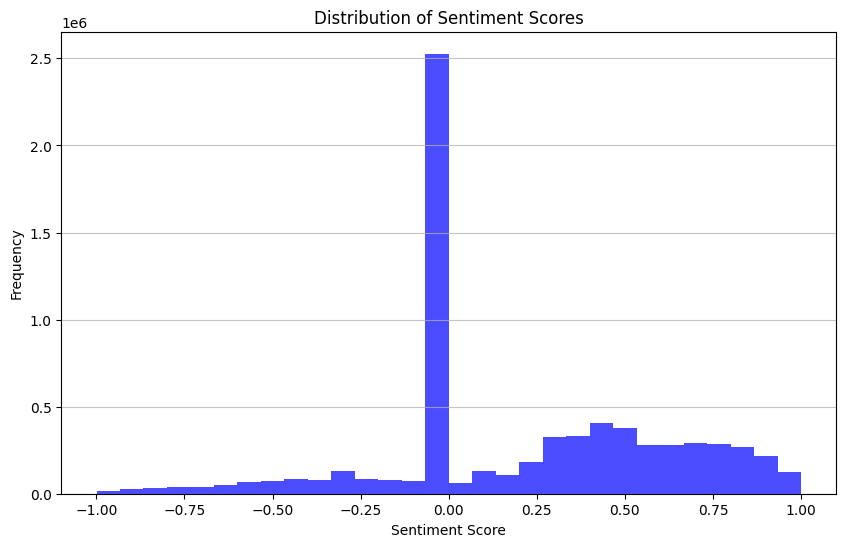

In [63]:
# Plotting the histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=30, alpha=0.7, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [64]:
# Stats
df['sentiment_score'].describe()

count    7.068447e+06
mean     2.239237e-01
std      3.937826e-01
min     -9.995000e-01
25%      0.000000e+00
50%      1.027000e-01
75%      5.267000e-01
max      1.000000e+00
Name: sentiment_score, dtype: float64

In [65]:
# Create a new column 'sentiment' based on the values in 'sentiment_score'
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [66]:
# Count sentiment
df['sentiment'].value_counts()

positive    3672070
neutral     2481860
negative     914517
Name: sentiment, dtype: int64

In [68]:
df = df.drop(columns=['sentence'])

In [69]:
# Save sentiment score

# Specify the file path where the Parquet file will be saved
file_path = 'sentiment.parquet'

# Save the DataFrame as a Parquet file
df.to_parquet(file_path)

- In comparing DistilBERT with VADER (Valence Aware Dictionary for Sentiment Reasoning), VADER achieved higher accuracy, leading to the decision to utilize VADER. DistilBERT often assigns excessive evaluations to sentences that VADER categorizes as neutral.
- The reason for VADER's higher accuracy may lie in its analysis at the level of short sentences, where its simpler design potentially worked more effectively. 
- Furthermore, given the short length of the texts and the already satisfactory results, it was determined that significant improvements in accuracy through customization were unlikely, and therefore, no customization has been undertaken.
- The decision to conduct sentiment analysis on a sentence-by-sentence basis, rather than on the entire article, was driven by the changes in content and sentiment within news articles and the high potential for improved accuracy in targeting sentiments towards entities.
- The proportion of scores that were overall positive was high.